In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
Univ = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Universities.csv")

In [ ]:
# standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [ ]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-square criterion:


In [ ]:
kmeans =KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_Univ_df)

In [ ]:
predict

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [ ]:
kmeans.inertia_

33.654341806512235

In [ ]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.9536816278831,
 23.028199078329926,
 18.56891703085987,
 16.301664640974554,
 13.47880438976081,
 10.640545447539141]

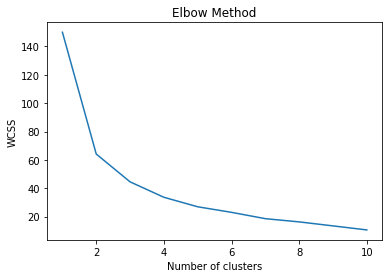

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [ ]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)


KMeans(n_clusters=4, random_state=42)

In [ ]:
dir(clusters_new)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

In [ ]:
clusters_new.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [ ]:
# Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_


In [ ]:
# These are standardized values.
clusters_new.cluster_centers_

array([[-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [ ]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [ ]:
Univ[Univ['clusterid_new']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
1,CalTech,1415,100,25,6,63575,81,3
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [ ]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
2,CMU,1260,62,59,9,25026,72,0
4,Cornell,1280,83,33,13,21864,90,0
7,Georgetown,1255,74,24,12,20126,92,0
11,Northwestern,1260,85,39,11,28052,89,0
12,NotreDame,1255,81,42,13,15122,94,0
18,UCBerkeley,1240,95,40,17,15140,78,0
19,UChicago,1290,75,50,13,38380,87,0
20,UMichigan,1180,65,68,16,15470,85,0
21,UPenn,1285,80,36,11,27553,90,0
22,UVA,1225,77,44,14,13349,92,0
